<a href="https://colab.research.google.com/github/elfkr7/Intro-to-DL/blob/main/ImageClassification_Birds_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [6]:
! pip install -q kaggle
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


In [7]:
! kaggle competitions download -c csc4851-homework4

100% 1.30G/1.30G [00:17<00:00, 94.0MB/s]
100% 1.30G/1.30G [00:17<00:00, 78.8MB/s]


In [8]:
!unzip csc4851-homework4.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: birds_400/train/VERMILION FLYCATHER/102.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/103.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/104.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/105.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/106.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/107.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/108.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/109.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/110.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/111.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/112.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/113.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/114.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/115.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/116.jpg  
  inflating: birds_400/train/VERMILION FLYCATHER/117.jpg  
  inflati

In [10]:
#libs
import matplotlib.pyplot as plt
import os
import sys
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.image as mpimg

In [14]:
#birds' categories examples
species = pd.read_csv("birds_400/class_dict.csv")
species

class_index                        class  height  width  scale by  Offset
0              0              ABBOTTS BABBLER     112    112         1       0
1              1                ABBOTTS BOOBY     112    112         1       0
2              2   ABYSSINIAN GROUND HORNBILL     112    112         1       0
3              3        AFRICAN CROWNED CRANE     112    112         1       0
4              4       AFRICAN EMERALD CUCKOO     112    112         1       0
..           ...                          ...     ...    ...       ...     ...
395          395     WILSONS BIRD OF PARADISE     112    112         1       0
396          396                    WOOD DUCK     112    112         1       0
397          397  YELLOW BELLIED FLOWERPECKER     112    112         1       0
398          398               YELLOW CACIQUE     112    112         1       0
399          399      YELLOW HEADED BLACKBIRD     112    112         1       0

[400 rows x 6 columns]

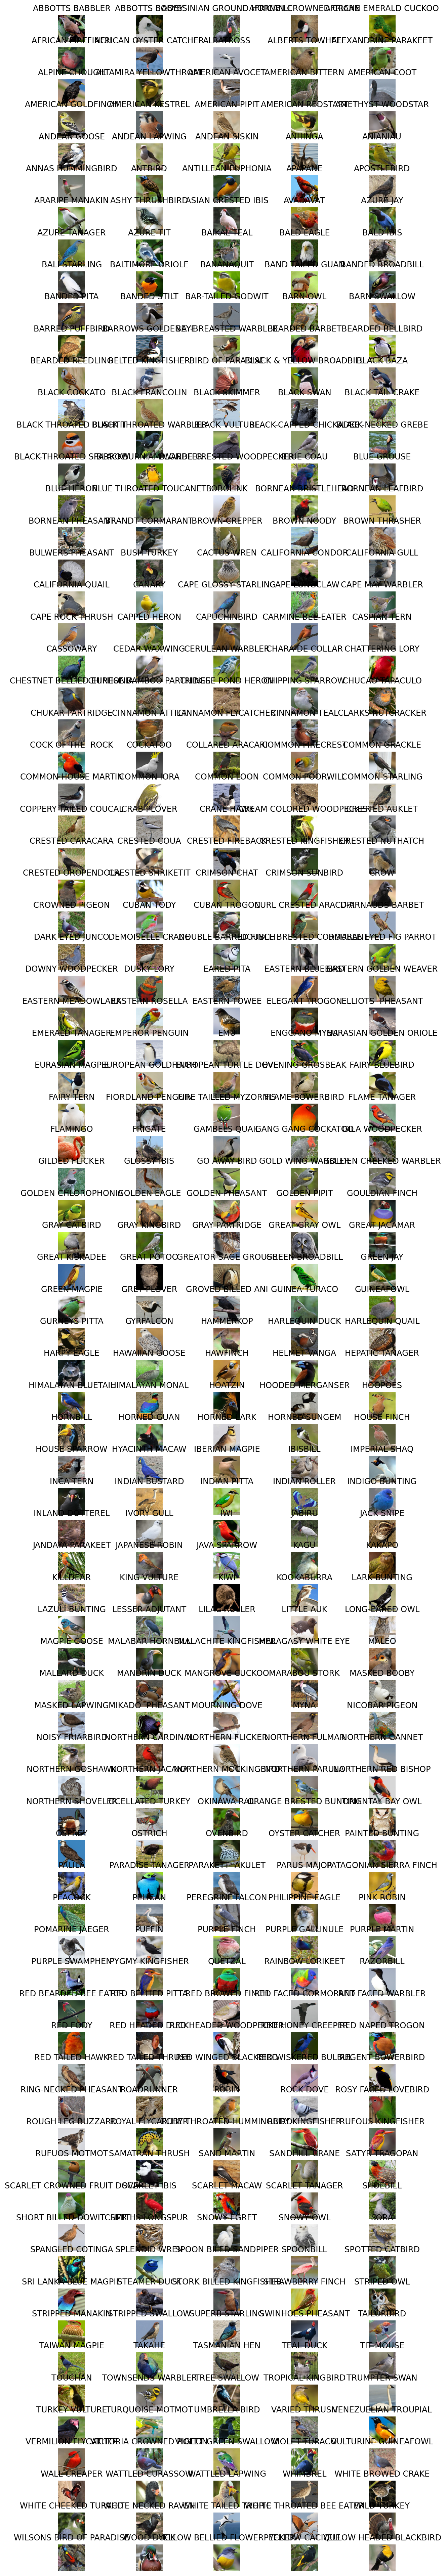

In [20]:
test_dir=os.path.join("birds_400/", 'test')
test_species_list=sorted(os.listdir(test_dir))
classes=len(os.listdir(test_dir))
fig = plt.figure(figsize=(10,70))
if classes % 5==0:
    rows=int(classes/5)
else:
    rows=int(classes/5) +1    
for row in range(rows):
    for column in range(5):
        i= row * 5 + column         
        if i>classes-1:
            break            
        specie=test_species_list[i]
        species_path=os.path.join(test_dir, specie)
        f_path=os.path.join(species_path, '1.jpg')        
        img = mpimg.imread(f_path)
        a = fig.add_subplot(rows, 5, i+1)
        imgplot=plt.imshow(img)
        a.axis("off")
        a.set_title(specie)	